# TP sur le Titanic

In [1]:
# Import des bibliothèques
import pandas as pd
import numpy as np

# Chargement des données du Titanic
titanic_data = pd.read_csv('./data/titanic/train.csv')

# Affichage des premières lignes du jeu de données pour voir un aperçu
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Imprimer la taille des données
print("La taille des données est : ", titanic_data.shape)   

La taille des données est :  (891, 12)


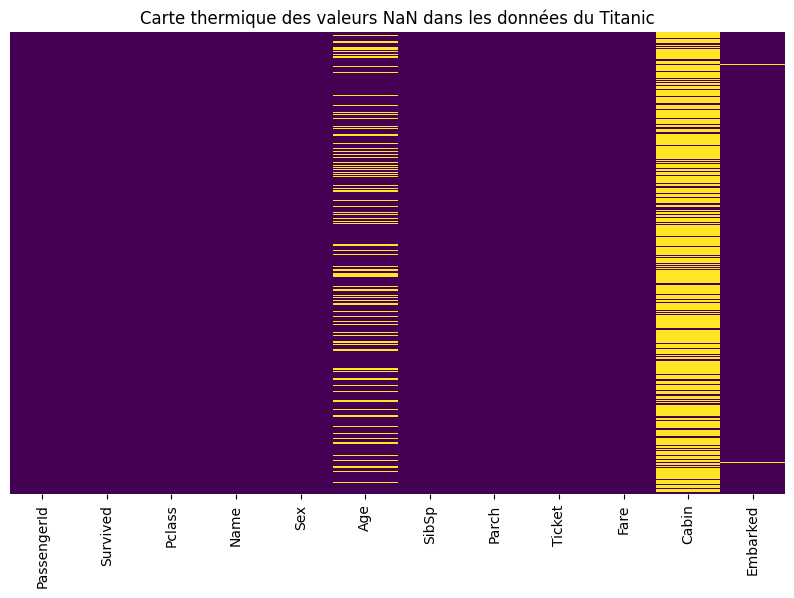

In [3]:
# Import des bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la carte thermique des valeurs NaN
plt.figure(figsize=(10, 6))  # Taille de la figure
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # isnull() crée un masque booléen pour NaN
plt.title("Carte thermique des valeurs NaN dans les données du Titanic")
plt.show()

In [4]:
# Calculer le pourcentage de valeurs manquantes dans la colonne 'Age'
age_nan_percentage = titanic_data['Age'].isna().mean() * 100

print(f"Le pourcentage des valeurs manquantes dans la colonne 'Age' est de : {age_nan_percentage:.2f}%")

Le pourcentage des valeurs manquantes dans la colonne 'Age' est de : 19.87%


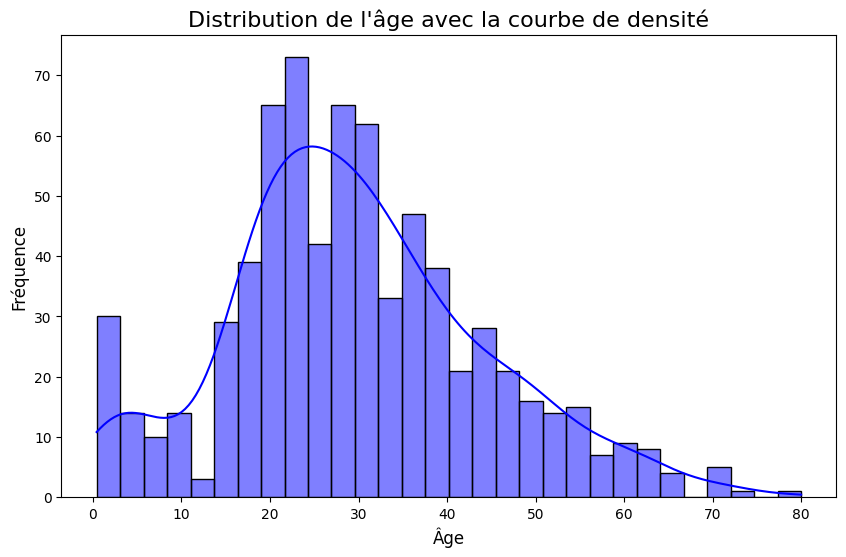

In [5]:
# Importer les bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer l'histogramme de la colonne 'Age' et ajouter une courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, color='blue', bins=30)

plt.title('Distribution de l\'âge avec la courbe de densité', fontsize=16)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

In [6]:
# Calculer la moyenne et la médiane de la colonne 'Age'
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()

print(f'Moyenne de l\'âge: {mean_age:.2f}')
print(f'Médiane de l\'âge: {median_age:.2f}')

Moyenne de l'âge: 29.70
Médiane de l'âge: 28.00


In [7]:
# Calculer le pourcentage de valeurs NaN dans la colonne 'Cabin'
cabin_nan_percentage = titanic_data['Cabin'].isna().mean() * 100

print(f'Pourcentage des valeurs NaN dans la colonne "Cabin": {cabin_nan_percentage:.2f}%')

Pourcentage des valeurs NaN dans la colonne "Cabin": 77.10%


C:\Users\33782\AppData\Local\Temp\ipykernel_9440\3744999483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data, x='Embarked', palette='Set2')


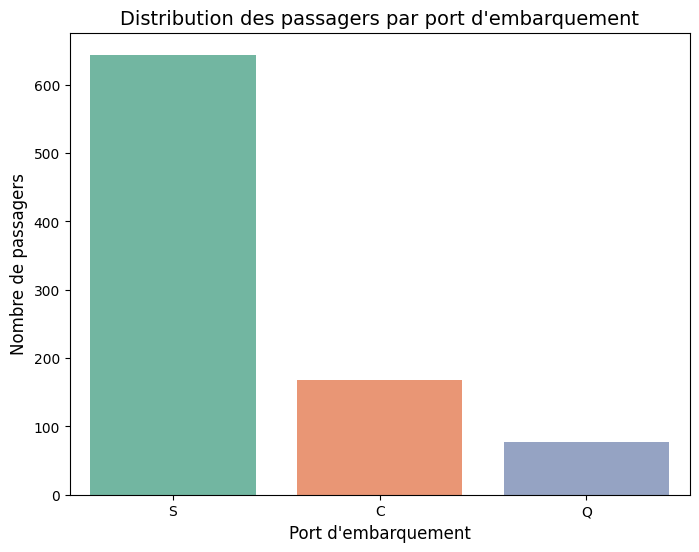

In [8]:
# Importer la bibliothèque pour le tracé
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la distribution de la colonne 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', palette='Set2')

plt.title('Distribution des passagers par port d\'embarquement', fontsize=14)
plt.xlabel('Port d\'embarquement', fontsize=12)
plt.ylabel('Nombre de passagers', fontsize=12)
plt.show()

In [9]:
# Appliquer le prétraitement
# Imputation des valeurs manquantes

# Imputer la colonne 'Age' avec la médiane (28 dans ce cas)
titanic_data['Age'].fillna(28, inplace=True)

# Imputer la colonne 'Embarked' avec le mode (valeur la plus fréquente) - ici 'S'
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Ignorer la colonne 'Cabin' car elle a trop de valeurs manquantes
titanic_data.drop('Cabin', axis=1, inplace=True)

# Vérifier les résultats après imputation
# Afficher le pourcentage de valeurs NaN restantes pour chaque colonne
nan_percentages = titanic_data.isnull().mean() * 100
print("Pourcentage de valeurs manquantes dans chaque colonne après prétraitement :")
print(nan_percentages)

# Afficher les premières lignes du dataset pour voir les modifications
print("\nAperçu des premières lignes du dataset après prétraitement :")
print(titanic_data.head())

Pourcentage de valeurs manquantes dans chaque colonne après prétraitement :
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Aperçu des premières lignes du dataset après prétraitement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, M

C:\Users\33782\AppData\Local\Temp\ipykernel_9440\1772601525.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(28, inplace=True)
C:\Users\33782\AppData\Local\Temp\ipykernel_9440\1772601525.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

C:\Users\33782\AppData\Local\Temp\ipykernel_9440\283496326.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(28, inplace=True)


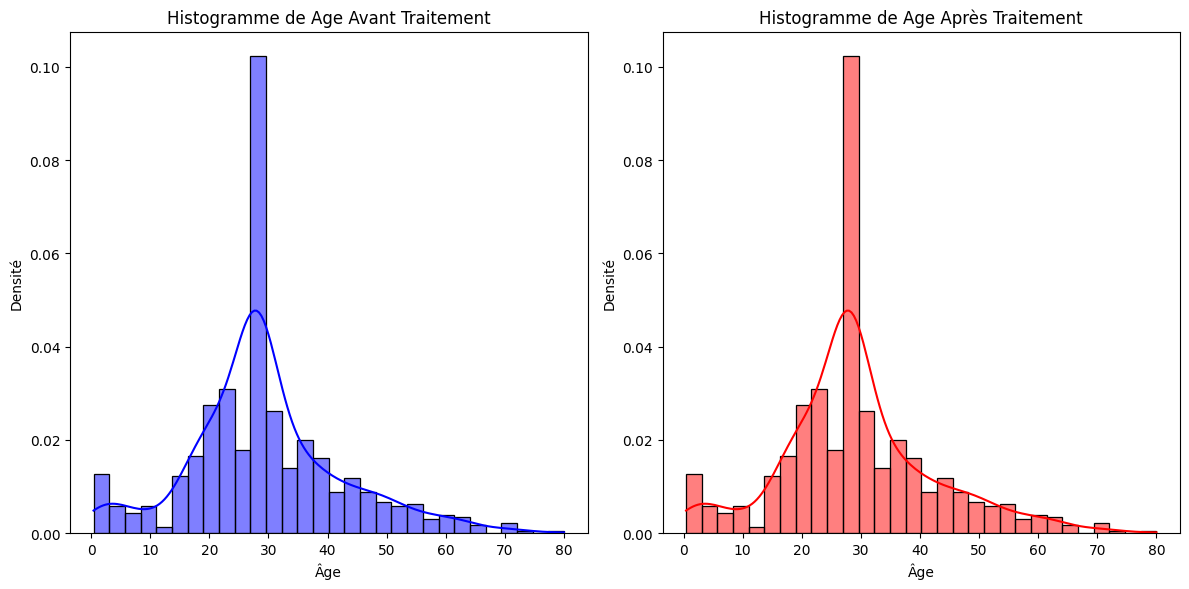

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Avant le traitement, stocker les valeurs d'âge d'origine pour comparaison
original_age = titanic_data['Age'].copy()

# Appliquer le prétraitement
# Imputer la colonne 'Age' avec la médiane (28 dans ce cas)
titanic_data['Age'].fillna(28, inplace=True)

# Créer un graphique avec deux histogrammes superposés
plt.figure(figsize=(12, 6))

# Histogramme avant traitement (original)
plt.subplot(1, 2, 1)
sns.histplot(original_age, kde=True, color='blue', stat='density', bins=30)
plt.title('Histogramme de Age Avant Traitement')
plt.xlabel('Âge')
plt.ylabel('Densité')

# Histogramme après traitement
plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Age'], kde=True, color='red', stat='density', bins=30)
plt.title('Histogramme de Age Après Traitement')
plt.xlabel('Âge')
plt.ylabel('Densité')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [11]:
# Créer la fonctionnalité "TravelAlone"
titanic_data['TravelAlone'] = (titanic_data['SibSp'] + titanic_data['Parch'] == 0).astype(int)

# Vérifier les premiers enregistrements pour voir le résultat
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  TravelAlone  
0      0         A/5 21171   7.2500        S            0  
1      0          PC 17599  71.2833        C            0  
2      0  STON/O2. 3101282   7.9250        S            1  
3      0            113803  53.1000        S            0  
4      0            

In [12]:
import pandas as pd

# Sélectionner les colonnes nécessaires pour l'encodage
df = titanic_data[['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'TravelAlone', 'Pclass', 'Embarked', 'Sex']]

# Créer des variables dummy pour les colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

print(df_encoded.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age            Ticket     Fare  TravelAlone  Pclass_2  Pclass_3  \
0  22.0         A/5 21171   7.2500            0     False      True   
1  38.0          PC 17599  71.2833            0     False     False   
2  26.0  STON/O2. 3101282   7.9250            1     False      True   
3  35.0            113803  53.1000            0     False     False   
4  35.0            373450   8.0500            1     False      True   

   Embarked_Q  Embarked_S  Sex_male  
0       False        True      True  
1       False       Fa

In [13]:
# Supprimer les colonnes non nécessaires
df_encoded_cleaned = df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket'])

print(df_encoded_cleaned.head())

   Survived   Age     Fare  TravelAlone  Pclass_2  Pclass_3  Embarked_Q  \
0         0  22.0   7.2500            0     False      True       False   
1         1  38.0  71.2833            0     False     False       False   
2         1  26.0   7.9250            1     False      True       False   
3         1  35.0  53.1000            0     False     False       False   
4         0  35.0   8.0500            1     False      True       False   

   Embarked_S  Sex_male  
0        True      True  
1       False     False  
2        True     False  
3        True     False  
4        True      True  


In [14]:
import pandas as pd
import numpy as np

# Chargement des données de test
test_df = pd.read_csv('./data/titanic/test.csv')

# Imputation des valeurs manquantes
# Remplir l'âge manquant par la médiane de l'âge
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Remplir les valeurs manquantes de 'Fare' par la médiane, car elle peut aussi influencer le modèle
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Remplir les valeurs manquantes de 'Embarked' par la valeur la plus fréquente
test_df['Embarked'].fillna('S', inplace=True)

# Création de la colonne "TravelAlone" (Voyager seul)
test_df['TravelAlone'] = np.where((test_df['SibSp'] + test_df['Parch']) == 0, 1, 0)

# Encodage des variables catégorielles
test_df_encoded = pd.get_dummies(test_df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

# Suppression des colonnes non nécessaires
test_df_final = test_df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'])

print(test_df_final.head())

    Age     Fare  TravelAlone  Pclass_2  Pclass_3  Embarked_Q  Embarked_S  \
0  34.5   7.8292            1     False      True        True       False   
1  47.0   7.0000            0     False      True       False        True   
2  62.0   9.6875            1      True     False        True       False   
3  27.0   8.6625            1     False      True       False        True   
4  22.0  12.2875            0     False      True       False        True   

   Sex_male  
0      True  
1     False  
2      True  
3      True  
4     False  


C:\Users\33782\AppData\Local\Temp\ipykernel_9440\4058096377.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\33782\AppData\Local\Temp\ipykernel_9440\4058096377.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

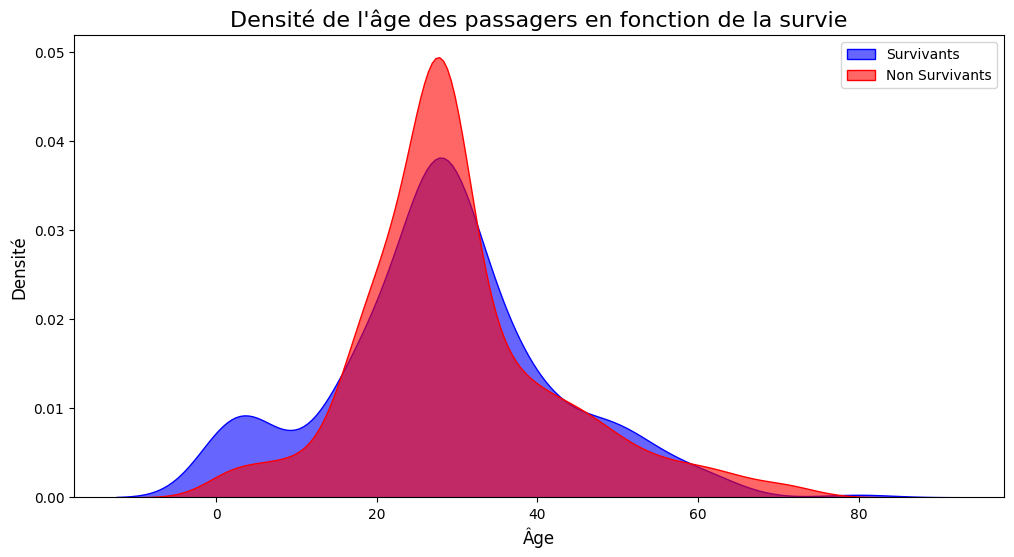

In [15]:
# Importer les bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Paramètres pour une meilleure visualisation
plt.figure(figsize=(12, 6))

# Distribution d'âge pour les passagers qui ont survécu
sns.kdeplot(data=titanic_data[titanic_data['Survived'] == 1], x="Age", fill=True, label="Survivants", color="blue", alpha=0.6)

# Distribution d'âge pour les passagers qui n'ont pas survécu
sns.kdeplot(data=titanic_data[titanic_data['Survived'] == 0], x="Age", fill=True, label="Non Survivants", color="red", alpha=0.6)

# Ajouter des titres et des légendes
plt.title("Densité de l'âge des passagers en fonction de la survie", fontsize=16)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.legend()

# Afficher le graphique
plt.show()


In [16]:
# Ajouter la colonne 'IsMinor' en fonction de la colonne 'Age'
titanic_data['IsMinor'] = (titanic_data['Age'] < 16).astype(int)

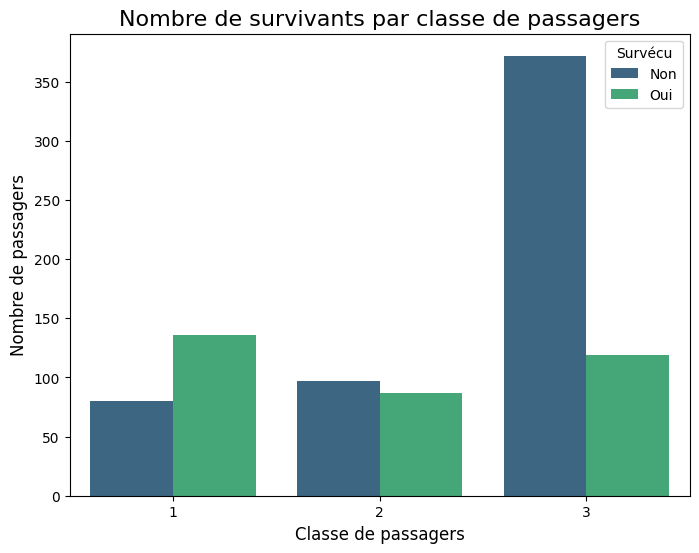

In [17]:
# Importer les bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique montrant le nombre de survivants par classe
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='viridis')

# Ajouter un titre et des labels
plt.title("Nombre de survivants par classe de passagers", fontsize=16)
plt.xlabel("Classe de passagers", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

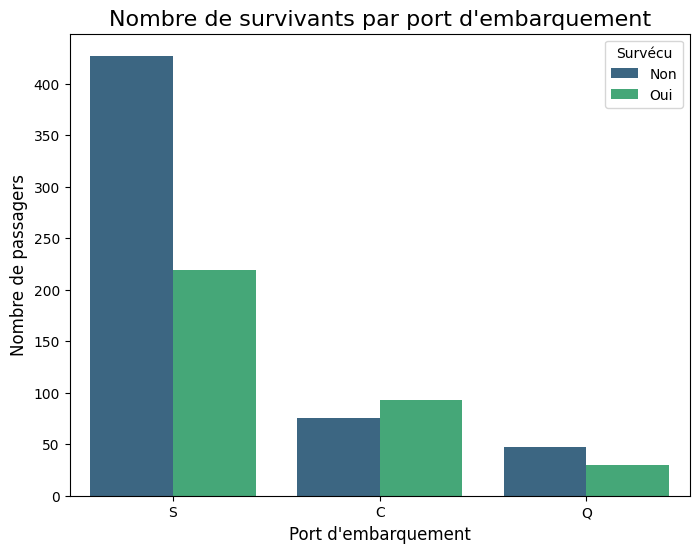

In [18]:
# Créer un graphique montrant le nombre de survivants par port d'embarquement
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Survived', palette='viridis')

# Ajouter un titre et des labels
plt.title("Nombre de survivants par port d'embarquement", fontsize=16)
plt.xlabel("Port d'embarquement", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

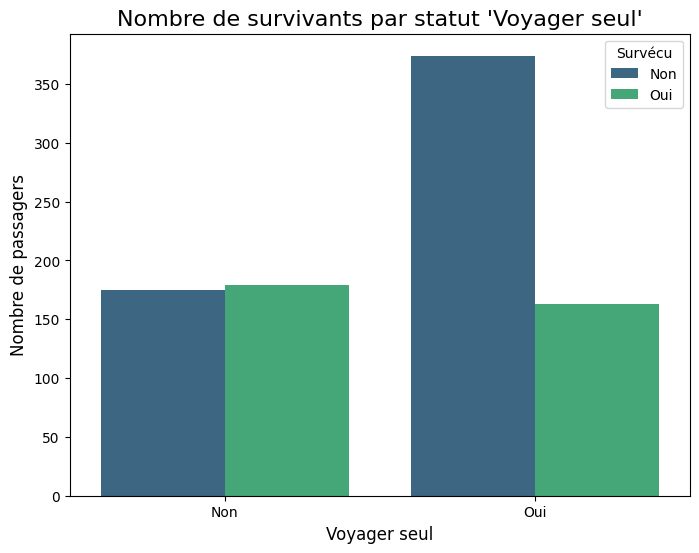

In [19]:
# Créer un graphique montrant le nombre de survivants par "Voyager seul"
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='TravelAlone', hue='Survived', palette='viridis')

# Ajouter un titre et des labels
plt.title("Nombre de survivants par statut 'Voyager seul'", fontsize=16)
plt.xlabel("Voyager seul", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.xticks([0, 1], ['Non', 'Oui'])  # Modifier les labels de l'axe x
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

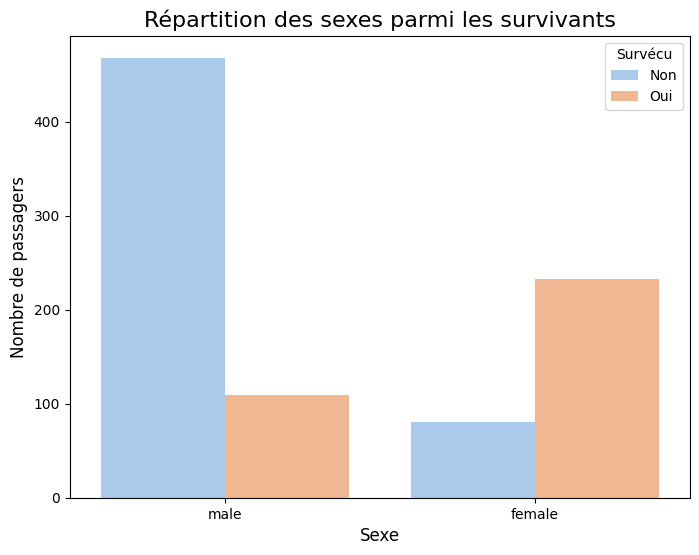

In [20]:
# Créer un graphique montrant la répartition des sexes parmi les survivants
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='pastel')

# Ajouter un titre et des labels
plt.title("Répartition des sexes parmi les survivants", fontsize=16)
plt.xlabel("Sexe", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et la cible (y)
X = df_encoded_cleaned.drop(columns=['Survived'])  # Suppression de la colonne cible
y = df_encoded_cleaned['Survived']  # La colonne cible

In [22]:
from sklearn.linear_model import LogisticRegression

# Instancier un modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)

In [23]:
from sklearn.feature_selection import RFE

# Créer un modèle RFE pour sélectionner 4 caractéristiques
rfe_4 = RFE(log_reg, n_features_to_select=4)
rfe_4.fit(X, y)

# Afficher les caractéristiques sélectionnées
selected_features_4 = X.columns[rfe_4.support_]
print(f'Selected features (4): {selected_features_4}')

Selected features (4): Index(['Pclass_2', 'Pclass_3', 'Embarked_S', 'Sex_male'], dtype='object')


In [24]:
# Créer un modèle RFE pour sélectionner 8 caractéristiques
rfe_8 = RFE(log_reg, n_features_to_select=8)
rfe_8.fit(X, y)

# Afficher les caractéristiques sélectionnées
selected_features_8 = X.columns[rfe_8.support_]
print(f'Selected features (8): {selected_features_8}')

Selected features (8): Index(['Age', 'Fare', 'TravelAlone', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')


Nombre optimal de caractéristiques : 7
Fonctionnalités sélectionnées : Index(['Age', 'TravelAlone', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')


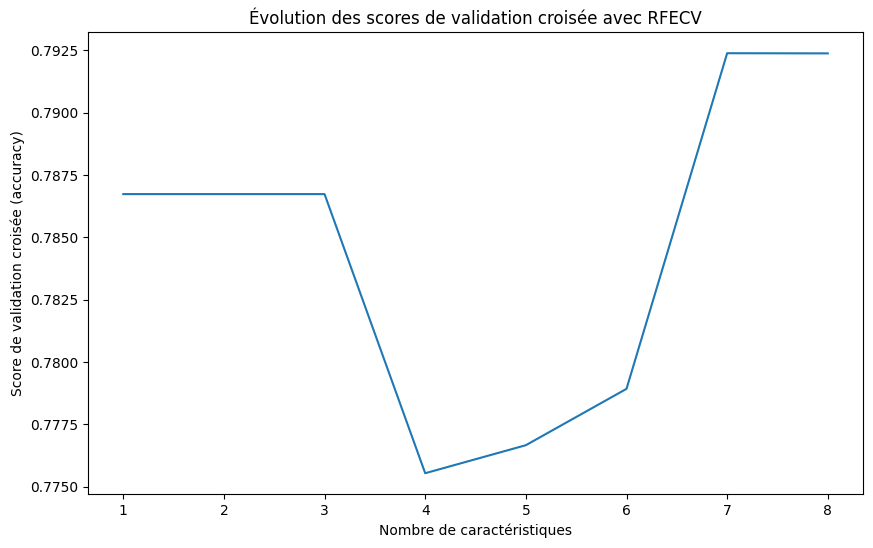

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Créer un modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)

# Définir la validation croisée
cv = StratifiedKFold(n_splits=5)  # 5 plis pour la validation croisée

# Instancier RFECV avec scoring='accuracy'
rfecv = RFECV(estimator=log_reg, step=1, cv=cv, scoring='accuracy')

# Appliquer RFECV sur les données X et y
rfecv.fit(X, y)

# Afficher le nombre optimal de caractéristiques
print(f'Nombre optimal de caractéristiques : {rfecv.n_features_}')

# Afficher les caractéristiques sélectionnées
selected_features_rfecv = X.columns[rfecv.support_]
print(f'Fonctionnalités sélectionnées : {selected_features_rfecv}')

# Tracer l'évolution des scores de validation croisée en fonction du nombre de caractéristiques
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('Score de validation croisée (accuracy)')
plt.title('Évolution des scores de validation croisée avec RFECV')
plt.show()


In [26]:
# Obtenir les caractéristiques sélectionnées par RFECV
selected_features = rfecv.support_  # Booleans qui indiquent quelles caractéristiques ont été sélectionnées
selected_feature_names = X.columns[selected_features]  # Noms des caractéristiques sélectionnées

# Créer un nouveau dataframe avec les 8 caractéristiques sélectionnées
X_selected = X[selected_feature_names]

# Vérifier la forme du nouveau dataframe
print(f"Forme du nouveau dataframe avec les 8 caractéristiques sélectionnées : {X_selected.shape}")

# Maintenant, nous allons entraîner un nouveau modèle de régression logistique
log_reg_selected = LogisticRegression(max_iter=1000)
log_reg_selected.fit(X_selected, y)

# Vous pouvez également évaluer le modèle si vous souhaitez
# Exemple d'évaluation avec précision
accuracy = log_reg_selected.score(X_selected, y)
print(f"Précision du modèle avec les 8 caractéristiques sélectionnées : {accuracy:.4f}")

Forme du nouveau dataframe avec les 8 caractéristiques sélectionnées : (891, 7)
Précision du modèle avec les 8 caractéristiques sélectionnées : 0.7946


In [27]:
from sklearn.model_selection import train_test_split

# Diviser les données en un ensemble d'entraînement et un ensemble de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Vérifier la forme des ensembles d'entraînement et de test
print(f"Forme de X_train: {X_train.shape}")
print(f"Forme de X_test: {X_test.shape}")
print(f"Forme de y_train: {y_train.shape}")
print(f"Forme de y_test: {y_test.shape}")

Forme de X_train: (712, 7)
Forme de X_test: (179, 7)
Forme de y_train: (712,)
Forme de y_test: (179,)


In [28]:
from sklearn.linear_model import LogisticRegression

# Instancier l'estimateur de régression logistique avec les paramètres par défaut
log_reg = LogisticRegression(max_iter=1000)  # Augmenter max_iter si nécessaire pour la convergence

# Adapter le modèle aux données d'entraînement
log_reg.fit(X_train, y_train)

# Afficher les coefficients du modèle pour un aperçu
print(f"Coefficients du modèle : \n{log_reg.coef_}")
print(f"Ordonnée à l'origine (intercept) : {log_reg.intercept_}")

Coefficients du modèle : 
[[-0.02281673  0.03669129 -0.52954339 -1.8554991  -0.14511808 -0.60486782
  -2.4567934 ]]
Ordonnée à l'origine (intercept) : [3.18825255]


In [29]:
# Faire une prédiction sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultats de la prédiction
print("Prédictions sur l'ensemble de test :")
print(y_pred)

Prédictions sur l'ensemble de test :
[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [30]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)  # Prédictions binaires (0 ou 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilités de la classe 1 (survivant)

# Calculer la précision (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"La précision du modèle est de {accuracy:.3f}")

# Calculer la perte log_loss (entropie croisée)
log_loss_value = log_loss(y_test, y_prob)
print(f"La perte log_loss de la régression logistique est de {log_loss_value:.3f}")

# Calculer l'aire sous la courbe ROC (AUC)
auc_value = roc_auc_score(y_test, y_prob)
print(f"L'AUC de la régression logistique est de {auc_value:.3f}")

La précision du modèle est de 0.788
La perte log_loss de la régression logistique est de 0.431
L'AUC de la régression logistique est de 0.875


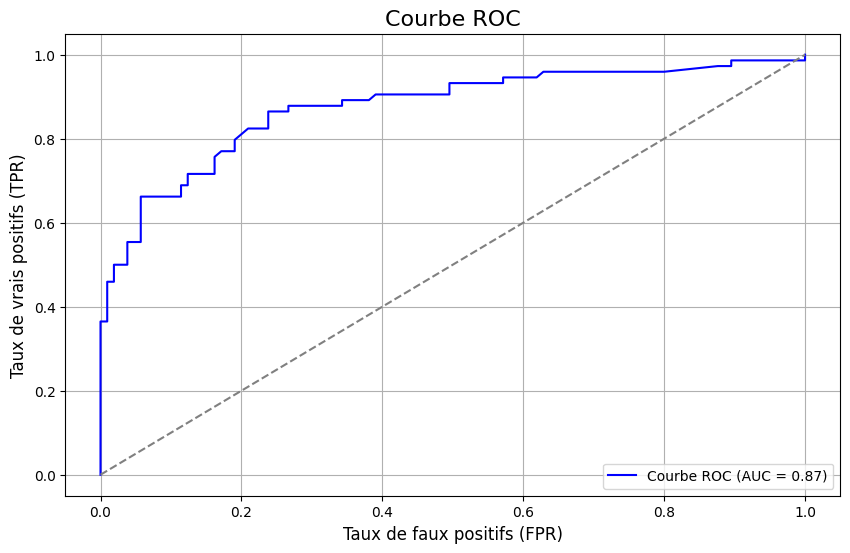

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculer les fausses positives (FPR), vraies positives (TPR) et seuils
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label='Courbe ROC (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ligne de hasard (AUC = 0.5)
plt.title('Courbe ROC', fontsize=16)
plt.xlabel('Taux de faux positifs (FPR)', fontsize=12)
plt.ylabel('Taux de vrais positifs (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

La courbe ROC montre la performance de notre modèle de régression logistique en fonction des taux de faux positifs (FPR) et des taux de vrais positifs (TPR). Ce graphique illustre la capacité du modèle à distinguer entre les passagers survivants (classe 1) et non survivants (classe 0).

On remarque que la courbe ROC est bien éloignée de la ligne diagonale (qui représente un modèle aléatoire avec une AUC de 0,5), ce qui indique que notre modèle parvient à différencier efficacement les deux classes. De plus, l'AUC (Area Under the Curve) est d'environ 0,872, ce qui est un excellent résultat. Cela signifie que le modèle a une forte capacité discriminante, étant capable de prédire correctement la classe avec un taux de confiance élevé.

En résumé, la courbe ROC confirme que le modèle fonctionne bien, et une AUC proche de 1 reflète une bonne capacité de classification.

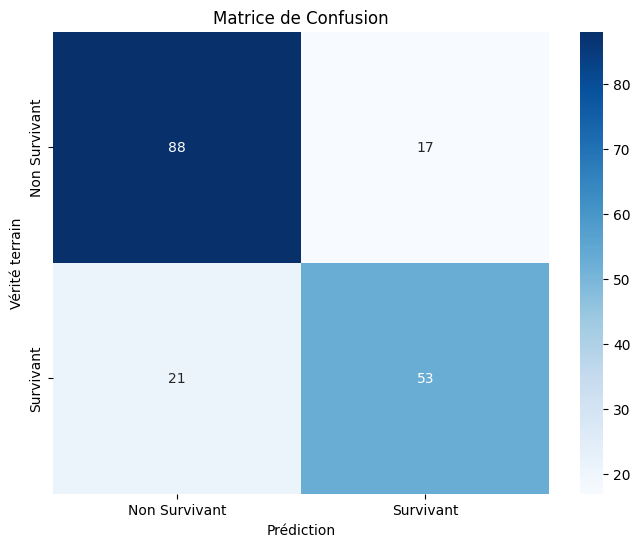

Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculer la matrice de confusion
y_pred = log_reg.predict(X_test)  # Prédictions sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec une carte thermique (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Non Survivant', 'Survivant'], yticklabels=['Non Survivant', 'Survivant'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.show()

# Afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("Rapport de Classification : \n", class_report)

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, log_loss, roc_auc_score

# Instancier un modèle de régression logistique
log_reg_cv = LogisticRegression(max_iter=1000)

# Définir les métriques à utiliser pendant la validation croisée
scoring = {'accuracy': make_scorer(accuracy_score),
           'neg_log_loss': make_scorer(log_loss, needs_proba=True),
           'roc_auc': make_scorer(roc_auc_score, needs_proba=True)}

# Effectuer la validation croisée avec 10 époques
cv_results = cross_validate(log_reg_cv, X, y, cv=10, scoring=scoring)

# Afficher les résultats des différentes métriques
print(f"Précision moyenne : {cv_results['test_accuracy'].mean():.4f}")
print(f"Perte log_loss moyenne : {-cv_results['test_neg_log_loss'].mean():.4f}")  # On inverse la perte log_loss pour l'afficher positivement
print(f"AUC moyenne : {cv_results['test_roc_auc'].mean():.4f}")

# Optionnel: Afficher les scores pour chaque époque
print("\nScores de chaque époque :")
print(f"Précision par époque : {cv_results['test_accuracy']}")
print(f"Perte log_loss par époque : {-cv_results['test_neg_log_loss']}")
print(f"AUC par époque : {cv_results['test_roc_auc']}")

c:\Users\33782\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Précision moyenne : 0.7924
Perte log_loss moyenne : -0.4567
AUC moyenne : 0.8456

Scores de chaque époque :
Précision par époque : [0.77777778 0.79775281 0.76404494 0.85393258 0.78651685 0.7752809
 0.76404494 0.7752809  0.82022472 0.80898876]
Perte log_loss par époque : [-0.46988794 -0.47588411 -0.54324819 -0.40978909 -0.43334842 -0.46429361
 -0.43710582 -0.47558534 -0.40993716 -0.44756004]
AUC par époque : [0.83064935 0.8342246  0.78368984 0.89438503 0.8513369  0.84705882
 0.85668449 0.82994652 0.87807487 0.84973545]
